# Taller Python # 2: Pandas

## Contenido

1. [Introducción](#intro)
2. [Taller](#taller)
    1. [Series](#series)
    2. [DataFrame](#df)
    3. [Bonus: Conexión a SQL](#sql)
3. [Ejercicios](#ejercicios)

## Introducción <a name="intro"></a>

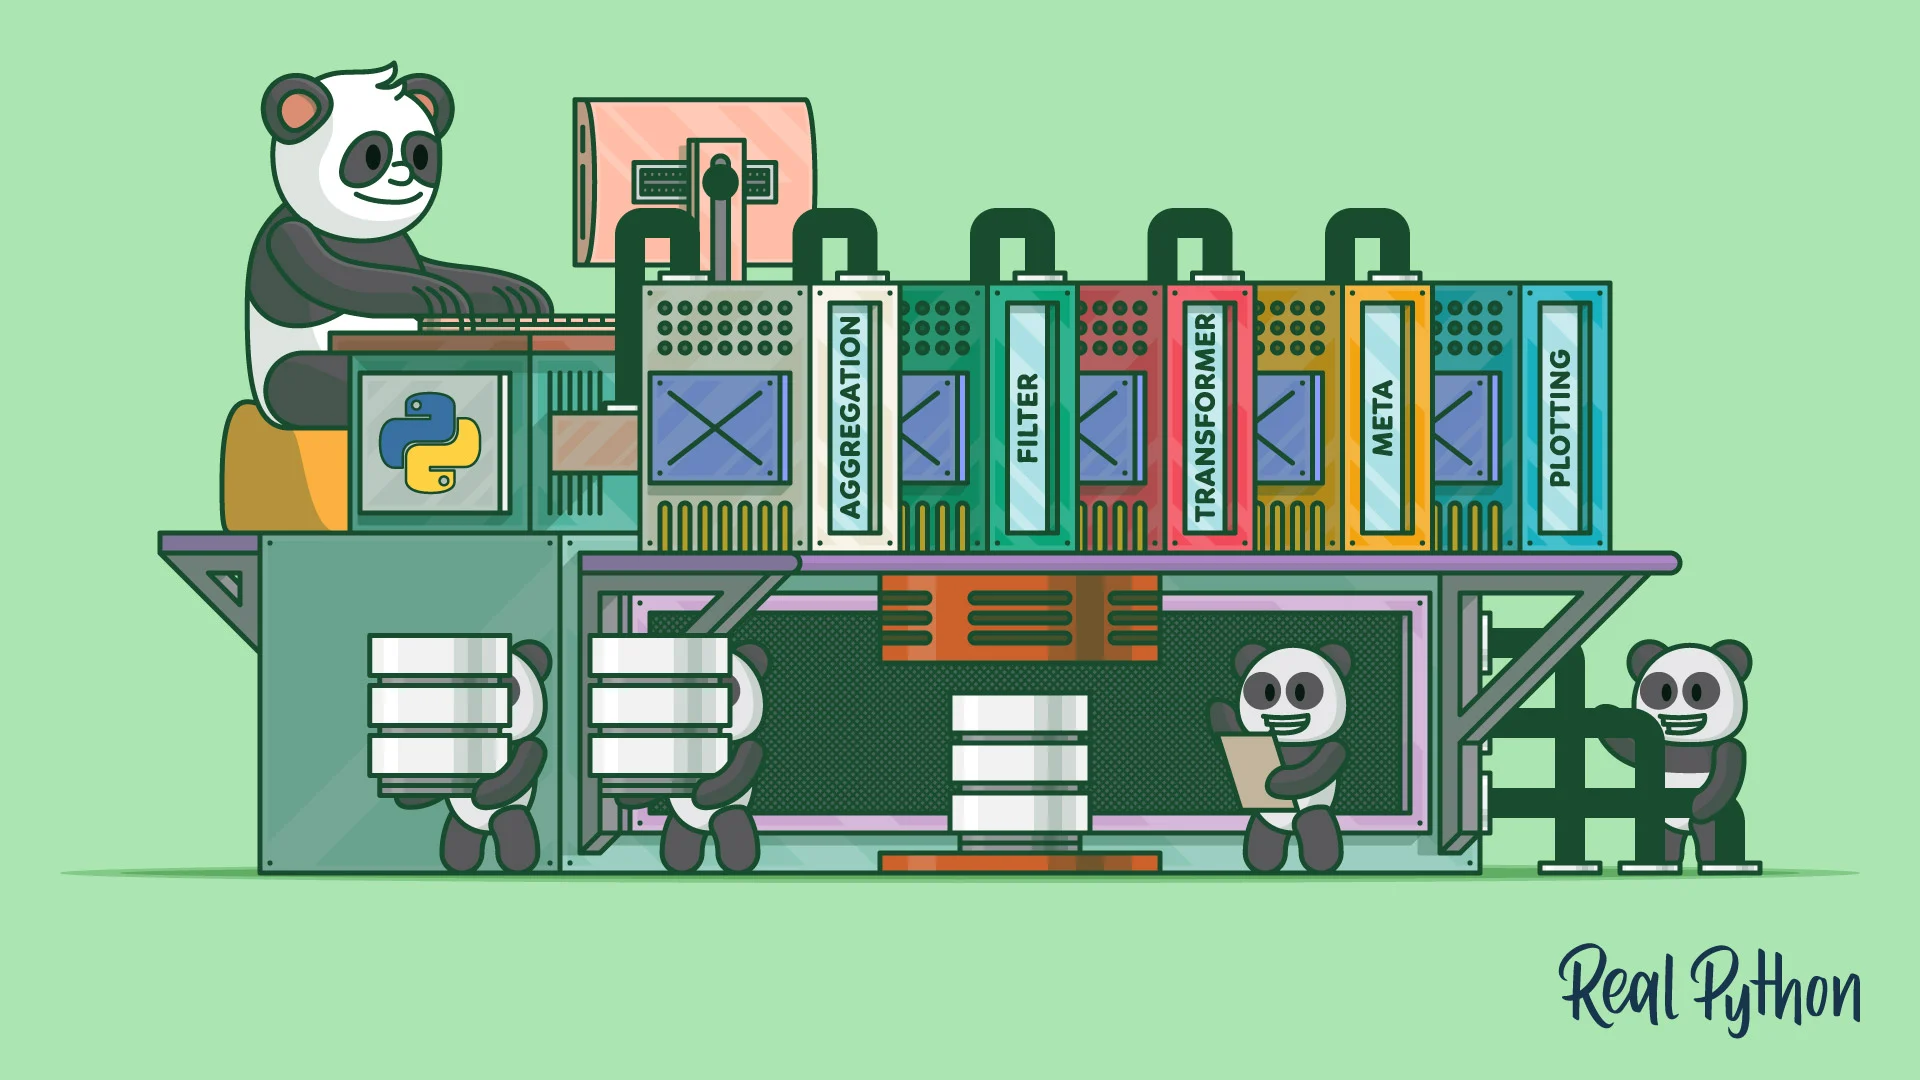

Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos.

Las principales características de esta librería son:

* Define nuevas estructuras de datos basadas en los arrays de la librería NumPy pero con nuevas funcionalidades.
* Permite leer y escribir fácilmente ficheros en formato CSV, Excel y bases de datos SQL.
* Permite acceder a los datos mediante índices o nombres para filas y columnas.
* Ofrece métodos para reordenar, dividir y combinar conjuntos de datos.
* Permite trabajar con series temporales.
* Realiza todas estas operaciones de manera muy eficiente (trabaja sobre numpy).

Pandas dispone de tres estructuras de datos diferentes:

* Series: Estructura de una dimensión.
* DataFrame: Estructura de dos dimensiones (tablas).
* Panel: Estructura de tres dimensiones (cubos).
    
Estas estructuras se construyen a partir de arrays de la librería NumPy, añadiendo nuevas funcionalidades. 

En el taller nos enfocaremos en las mas utilizadas que son las dos primeras: Series y DataFrame

## Taller <a name="taller"></a>

Para el taller utilizaremos el dataset de Ifood obtenido de https://www.kaggle.com/datasets/ricardotachinardi/ifood-restaurants-data, el cual contiene información acerca de todo los restaurantes en Ifood Brasil para Febrero del 2021. La data contiene el nombre del restaurante, logo, categoria, costos de envío, ubicación, rango de precios entre otros.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('IFood.csv', sep = ',')

In [13]:
nuevo_df = pd.DataFrame()
nuevo_df['https'] = df['avatar'].str[0:5]
nuevo_df['col2'] = df['avatar'].str[5:10]
nuevo_df['llave'] = df['avatar'].str[0:5] + df['avatar'].str[5:10]
                

In [14]:
nuevo_df

,https,col2,llave
0,https,://st,https://st
1,https,://st,https://st
2,https,://st,https://st
3,https,://st,https://st
4,https,://st,https://st
...,...,...,...
406394,https,://st,https://st
406395,https,://st,https://st
406396,https,://st,https://st
406397,https,://st,https://st


### Series <a name="series"></a>

Son estructuras similares a los arrays de una dimensión. Son homogéneas, es decir, sus elementos tienen que ser del mismo tipo, y su tamaño es inmutable, es decir, no se puede cambiar, aunque si su contenido.

Dispone de un índice que asocia un nombre a cada elemento del la serie, a través de la cuál se accede al elemento.


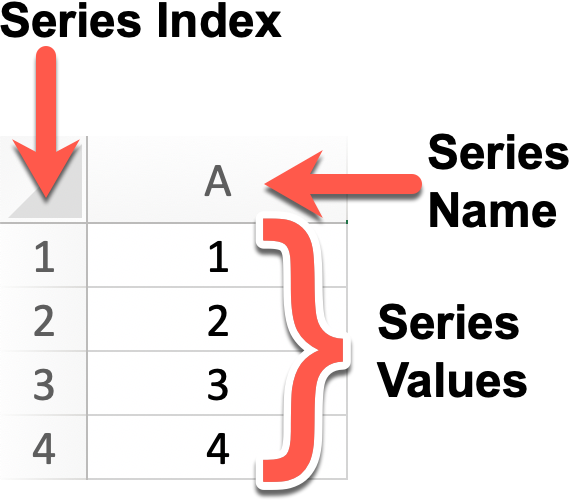

Cada columna dentro del dataframe es una serie

In [3]:
dtime = df['delivery_time']

In [4]:
dtime

0         27
1         61
2         70
3         63
4         58
          ..
406394    60
406395    50
406396    40
406397    60
406398    20
Name: delivery_time, Length: 406399, dtype: int64

Podemos utilizar los comandos `shape`, `size` y `dtype` para conocer un poco mas de la serie.
* `shape` nos entrega las dimensiones de la serie.
* `size` nos entrega el numero de elementos de la serie. Es parecido al comando `len()` que usamos cuando vimos listas.
* `dtype` nos devuelve el tipo de dato de la serie.

In [5]:
dtime.shape

(406399,)

In [6]:
dtime.size

406399

In [7]:
dtime.dtype

dtype('int64')

Tal y como vimos en el taller pasado, podemos acceder a los elementos de la serie bien sea por posicion, con el comando `iloc` o por nombre del indice con el comando `loc`

In [8]:
dtime.iloc[0]

27

In [9]:
dtime.loc[2]

70

Para empezar a conocer un poco mas de nuestros datos podemos usar algunas de las funciones propias de pandas como:
* `s.count()` : Devuelve el número de elementos que no son nulos ni `NaN` en la serie s.
* `s.sum()` : Devuelve la suma de los datos de la serie s cuando los datos son de un tipo numérico, o la concatenación de ellos cuando son del tipo cadena `str`.
* `s.cumsum()` : Devuelve una serie con la suma acumulada de los datos de la serie s cuando los datos son de un tipo numérico.
* `s.value_counts()` : Devuelve una serie con la frecuencia (número de repeticiones) de cada valor de la serie s.
* `s.min()` : Devuelve el menor de los datos de la serie s.
* `s.max()` : Devuelve el mayor de los datos de la serie s.
* `s.mean()` : Devuelve la media de los datos de la serie s cuando los datos son de un tipo numérico.
* `s.std()` : Devuelve la desviación típica de los datos de la serie s cuando los datos son de un tipo numérico.
* `s.describe()`: Devuelve una serie con un resumen descriptivo que incluye el número de datos, su suma, el mínimo, el máximo, la media, la desviación típica y los cuartiles.

In [10]:
dtime.count()

406399

In [11]:
dtime.sum()

19276621

In [12]:
dtime.cumsum()

0               27
1               88
2              158
3              221
4              279
            ...   
406394    19276451
406395    19276501
406396    19276541
406397    19276601
406398    19276621
Name: delivery_time, Length: 406399, dtype: int64

In [13]:
dtime.value_counts()

 60      45243
 50      40570
 40      39423
 35      20681
 45      20364
         ...  
 183         1
 5050        1
 137         1
 309         1
-1           1
Name: delivery_time, Length: 190, dtype: int64

In [14]:
dtime.min()

-1

In [15]:
dtime.max()

5050

In [16]:
dtime.mean()

47.43274712782266

In [17]:
dtime.std()

19.66273597968361

In [18]:
dtime.describe()

count    406399.000000
mean         47.432747
std          19.662736
min          -1.000000
25%          35.000000
50%          45.000000
75%          60.000000
max        5050.000000
Name: delivery_time, dtype: float64

Podemos hacer operaciones matemáticas sobre las series de manera similar a los numpy arrays:

In [19]:
dtime * 2

0          54
1         122
2         140
3         126
4         116
         ... 
406394    120
406395    100
406396     80
406397    120
406398     40
Name: delivery_time, Length: 406399, dtype: int64

In [20]:
dtime + 15

0         42
1         76
2         85
3         78
4         73
          ..
406394    75
406395    65
406396    55
406397    75
406398    35
Name: delivery_time, Length: 406399, dtype: int64

De la misma maera podemos aplicar funciones a toda la serie con el comando `apply()`

In [21]:
dtime.apply(np.log)

0         3.295837
1         4.110874
2         4.248495
3         4.143135
4         4.060443
            ...   
406394    4.094345
406395    3.912023
406396    3.688879
406397    4.094345
406398    2.995732
Name: delivery_time, Length: 406399, dtype: float64

Podemos incluso definir nuestras propias funciones y aplicarlas

In [22]:
def funcion(x):
    return x ** 2

In [23]:
dtime.apply(funcion)

0          729
1         3721
2         4900
3         3969
4         3364
          ... 
406394    3600
406395    2500
406396    1600
406397    3600
406398     400
Name: delivery_time, Length: 406399, dtype: int64

También podemos filtrar la serie basado en los valores de la misma. Por ejemplo, si quisieramos encontrar todos los tiempor de entrega mayores a una hora:

In [24]:
dtime[dtime > 60]

1         61
2         70
3         63
5         67
11        80
          ..
406368    70
406371    90
406373    75
406374    75
406376    80
Name: delivery_time, Length: 67015, dtype: int64

Podemos ordenar la serie de acuerdo a sus valores, la forma mas común de hacerlo es con el comando `sort_values()`. Este comando recibe un parámetro llamado `ascending` que puede ser `True` o `False` y le indica a la serie la manera en que queremos que sea ordena, si de manera ascendente o descendente.

In [25]:
dtime.sort_values(ascending = True)

191853      -1
330388       0
358893       0
331056       0
335992       0
          ... 
223795     510
363197     999
98611     1335
185719    1456
231352    5050
Name: delivery_time, Length: 406399, dtype: int64

Si tuvieramos valores nulos podemos eliminarlos o llenarlos con los comandos `dropna()` y `fillna()`, respectivamente

In [26]:
s = pd.Series(['a', 'b', None, 'c', np.NaN,  'd'])

In [27]:
s.dropna()

0    a
1    b
3    c
5    d
dtype: object

In [28]:
s.fillna(0)

0    a
1    b
2    0
3    c
4    0
5    d
dtype: object

### Dataframe <a name="df"></a>

Un objeto del tipo DataFrame define un conjunto de datos estructurado en forma de tabla donde cada columna es un objeto de tipo Series, es decir, todos los datos de una misma columna son del mismo tipo, y las filas son registros que pueden contender datos de distintos tipos. Imaginen que es una hoja de Excel, puede tener todo tipo de datos en cada una de sus columnas

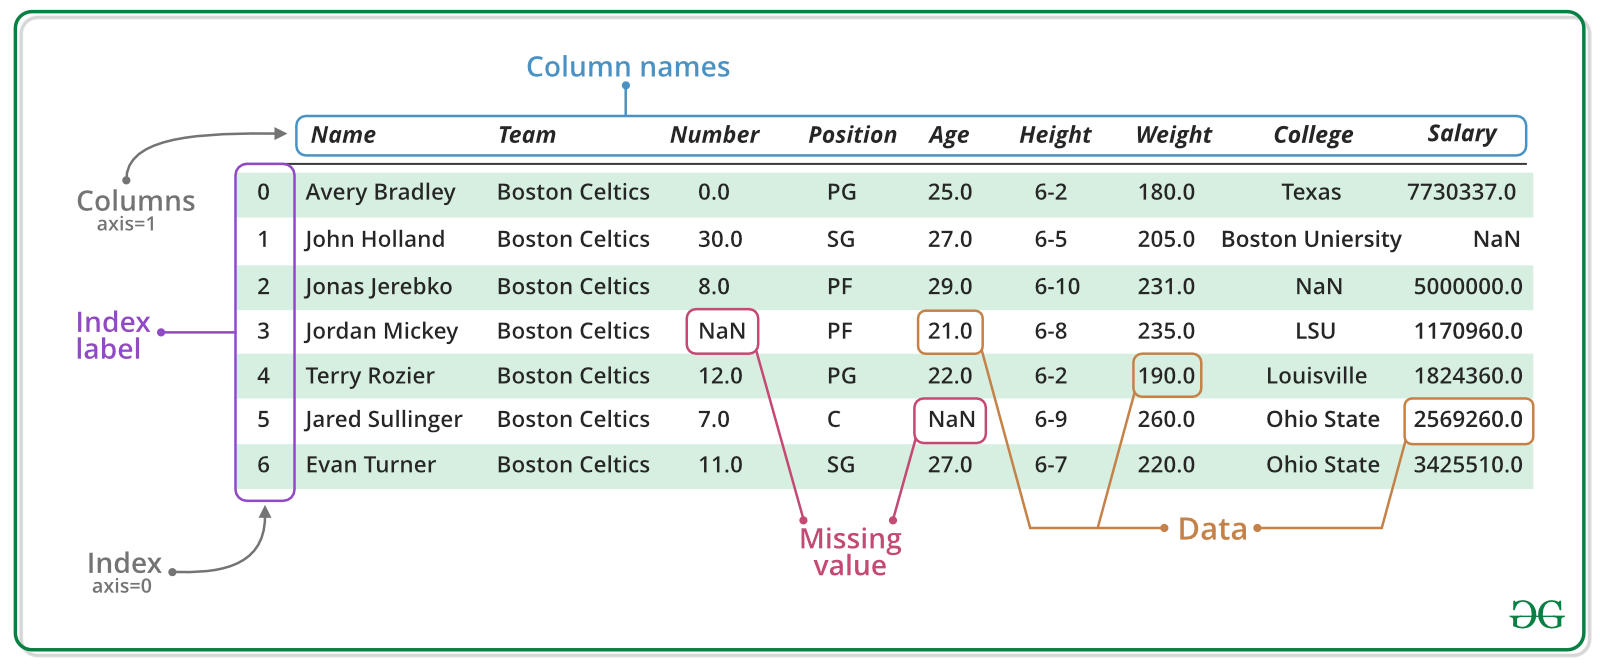

Como vimos anteriormente, podemos crear dataframes dese lisas, arrays y diccionarios, pero la manera mas sencilla es crearlo desde un archivo de datos externo bien sea un `.csv, .xlsx` o `.txt` 

In [29]:
df = pd.read_csv('IFood.csv')

Existen varios comandos que nos ayudan a familiarizarnos con el dataframe antes de empezar.

* `df.info()` : Devuelve información (número de filas, número de columnas, índices, tipo de las columnas y memoria usado) sobre el DataFrame df.

* `df.shape` : Devuelve una tupla con el número de filas y columnas del DataFrame df.

* `df.size` : Devuelve el número de elementos del DataFrame.

* `df.columns` : Devuelve una lista con los nombres de las columnas del DataFrame df.

* `df.index` : Devuelve una lista con los nombres de las filas del DataFrame df.

* `df.dtypes` : Devuelve una serie con los tipos de datos de las columnas del DataFrame df.

* `df.head(n)` : Devuelve las n primeras filas del DataFrame df.

* `df.tail(n)` : Devuelve las n últimas filas del DataFrame df.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406399 entries, 0 to 406398
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   availableForScheduling  406399 non-null  bool   
 1   avatar                  406122 non-null  object 
 2   category                406399 non-null  object 
 3   delivery_fee            406399 non-null  float64
 4   delivery_time           406399 non-null  int64  
 5   distance                406399 non-null  float64
 6   ibge                    406399 non-null  int64  
 7   minimumOrderValue       406399 non-null  float64
 8   name                    406399 non-null  object 
 9   paymentCodes            406397 non-null  object 
 10  price_range             406399 non-null  object 
 11  rating                  406399 non-null  float64
 12  tags                    406399 non-null  object 
 13  url                     406399 non-null  object 
dtypes: bool(1), float64(

In [31]:
df.shape

(406399, 14)

In [32]:
df.size

5689586

In [33]:
df.columns

Index(['availableForScheduling', 'avatar', 'category', 'delivery_fee',
       'delivery_time', 'distance', 'ibge', 'minimumOrderValue', 'name',
       'paymentCodes', 'price_range', 'rating', 'tags', 'url'],
      dtype='object')

In [34]:
df.index

RangeIndex(start=0, stop=406399, step=1)

In [35]:
df.dtypes

availableForScheduling       bool
avatar                     object
category                   object
delivery_fee              float64
delivery_time               int64
distance                  float64
ibge                        int64
minimumOrderValue         float64
name                       object
paymentCodes               object
price_range                object
rating                    float64
tags                       object
url                        object
dtype: object

In [36]:
df.head()

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
0,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,Toma na Kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,Churrasquinho do Barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,Prime Restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...


In [37]:
df.tail()

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
406394,False,https://static-images.ifood.com.br/image/uploa...,Açaí,9.0,60,3.53,4309209,30.0,Açaí da Duda,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.95000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_5_L...,https://www.ifood.com.br/delivery/gravatai-rs/...
406395,False,https://static-images.ifood.com.br/image/uploa...,Açaí,6.0,50,2.60,4309209,10.0,Pede aí açaí,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/cachoeirinha...
406396,False,https://static-images.ifood.com.br/image/uploa...,Açaí,0.0,40,3.61,4309209,0.0,Açaí do Jeitinho Brasileiro,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.46602,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/gravatai-rs/...
406397,False,https://static-images.ifood.com.br/image/uploa...,Lanches,8.0,60,3.54,4309209,20.0,Classic Burger,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,5.00000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_5_L...,https://www.ifood.com.br/delivery/gravatai-rs/...
406398,False,https://static-images.ifood.com.br/image/uploa...,Doces & Bolos,9.0,20,0.95,4309209,0.0,Cacau Show - Cachoerinha Shopping,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,MODERATE,4.84000,ADDRESS_PREFORM_TYPE $$ BF_CUPOM15OFF_NOV20 $$...,https://www.ifood.com.br/delivery/cachoeirinha...


Podemos cambiar el nombres de las columnas del dataframe pasando un diccionario a la función `rename()`

In [38]:
df.rename(columns = {'category':'categoría'}, index = {0: 'Prueba'})

,availableForScheduling,avatar,categoría,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,name,paymentCodes,price_range,rating,tags,url
Prueba,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,Cantina Arte & Sabor,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,Raruty Açaí Raiz,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,Toma na Kombi,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.00000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,Churrasquinho do Barriga´s,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,Prime Restaurante,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406394,False,https://static-images.ifood.com.br/image/uploa...,Açaí,9.00,60,3.53,4309209,30.0,Açaí da Duda,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.95000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_5_L...,https://www.ifood.com.br/delivery/gravatai-rs/...
406395,False,https://static-images.ifood.com.br/image/uploa...,Açaí,6.00,50,2.60,4309209,10.0,Pede aí açaí,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/cachoeirinha...
406396,False,https://static-images.ifood.com.br/image/uploa...,Açaí,0.00,40,3.61,4309209,0.0,Açaí do Jeitinho Brasileiro,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.46602,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/gravatai-rs/...
406397,False,https://static-images.ifood.com.br/image/uploa...,Lanches,8.00,60,3.54,4309209,20.0,Classic Burger,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,5.00000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_5_L...,https://www.ifood.com.br/delivery/gravatai-rs/...


Podemos cambiar el index del dataframe con el comando `set_index()` y podemos "eliminar" el index con el comando `reset_index()`

In [39]:
df.set_index('name')

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,paymentCodes,price_range,rating,tags,url
name,,,,,,,,,,,,,
Cantina Arte & Sabor,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
Raruty Açaí Raiz,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
Toma na Kombi,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.00000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
Churrasquinho do Barriga´s,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
Prime Restaurante,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Açaí da Duda,False,https://static-images.ifood.com.br/image/uploa...,Açaí,9.00,60,3.53,4309209,30.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.95000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_5_L...,https://www.ifood.com.br/delivery/gravatai-rs/...
Pede aí açaí,False,https://static-images.ifood.com.br/image/uploa...,Açaí,6.00,50,2.60,4309209,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/cachoeirinha...
Açaí do Jeitinho Brasileiro,False,https://static-images.ifood.com.br/image/uploa...,Açaí,0.00,40,3.61,4309209,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.46602,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/gravatai-rs/...


In [40]:
df.set_index('name').reset_index()

,name,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,paymentCodes,price_range,rating,tags,url
0,Cantina Arte & Sabor,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
1,Raruty Açaí Raiz,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
2,Toma na Kombi,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.00000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
3,Churrasquinho do Barriga´s,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
4,Prime Restaurante,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
406394,Açaí da Duda,False,https://static-images.ifood.com.br/image/uploa...,Açaí,9.00,60,3.53,4309209,30.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.95000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_5_L...,https://www.ifood.com.br/delivery/gravatai-rs/...
406395,Pede aí açaí,False,https://static-images.ifood.com.br/image/uploa...,Açaí,6.00,50,2.60,4309209,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/cachoeirinha...
406396,Açaí do Jeitinho Brasileiro,False,https://static-images.ifood.com.br/image/uploa...,Açaí,0.00,40,3.61,4309209,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.46602,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/gravatai-rs/...
406397,Classic Burger,False,https://static-images.ifood.com.br/image/uploa...,Lanches,8.00,60,3.54,4309209,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,5.00000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_5_L...,https://www.ifood.com.br/delivery/gravatai-rs/...


De la misma manera que lo haciamos para Series, podemos extraer los valores del DataFrame mediante el nombre, con el comando `loc` o mediante la posición, con el comando `iloc`. Coloquemos el nombre del restaurante como índice para ver la diferencia

In [41]:
df.set_index('name', inplace = True)

In [42]:
df.head()

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,paymentCodes,price_range,rating,tags,url
name,,,,,,,,,,,,,
Cantina Arte & Sabor,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...
Raruty Açaí Raiz,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...
Toma na Kombi,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.0,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...
Churrasquinho do Barriga´s,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...
Prime Restaurante,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.0,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...


Por nombre:

In [43]:
df.loc['Cantina Arte & Sabor']

availableForScheduling                                                False
avatar                    https://static-images.ifood.com.br/image/uploa...
category                                                            Marmita
delivery_fee                                                           3.99
delivery_time                                                            27
distance                                                               1.22
ibge                                                                5300108
minimumOrderValue                                                        10
paymentCodes              DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...
price_range                                                        CHEAPEST
rating                                                                    0
tags                      ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...
url                       https://www.ifood.com.br/delivery/brasilia-df/...
Name: Cantin

In [44]:
df.loc['Cantina Arte & Sabor', 'category']

'Marmita'

In [45]:
df['category']

name
Cantina Arte & Sabor                       Marmita
Raruty Açaí Raiz                              Açaí
Toma na Kombi                              Bebidas
Churrasquinho do Barriga´s                  Carnes
Prime Restaurante                       Brasileira
                                         ...      
Açaí da Duda                                  Açaí
Pede aí açaí                                  Açaí
Açaí do Jeitinho Brasileiro                   Açaí
Classic Burger                             Lanches
Cacau Show - Cachoerinha Shopping    Doces & Bolos
Name: category, Length: 406399, dtype: object

In [46]:
df.category

name
Cantina Arte & Sabor                       Marmita
Raruty Açaí Raiz                              Açaí
Toma na Kombi                              Bebidas
Churrasquinho do Barriga´s                  Carnes
Prime Restaurante                       Brasileira
                                         ...      
Açaí da Duda                                  Açaí
Pede aí açaí                                  Açaí
Açaí do Jeitinho Brasileiro                   Açaí
Classic Burger                             Lanches
Cacau Show - Cachoerinha Shopping    Doces & Bolos
Name: category, Length: 406399, dtype: object

Por posición

In [47]:
df.iloc[0]

availableForScheduling                                                False
avatar                    https://static-images.ifood.com.br/image/uploa...
category                                                            Marmita
delivery_fee                                                           3.99
delivery_time                                                            27
distance                                                               1.22
ibge                                                                5300108
minimumOrderValue                                                        10
paymentCodes              DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...
price_range                                                        CHEAPEST
rating                                                                    0
tags                      ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...
url                       https://www.ifood.com.br/delivery/brasilia-df/...
Name: Cantin

In [48]:
df.iloc[0, 2] #Elemento de la primera fila y segunda columna

'Marmita'

Si, por otro lado, quisieramos agregar una nueva columna al Dataframe simplemente le pasamos el nombre entre corchetes cuadrados y la serie o lista.

In [49]:
df['half_price'] = df['delivery_fee'] / 2

Como hicimos en la celda de arriba podemos aplicar operaciones matemáticas a las columnas del DataFrame o aplicar una función cualquiera, como lo hicimos en las Series

In [50]:
df['delivery_fee'].apply(funcion)

name
Cantina Arte & Sabor                  15.9201
Raruty Açaí Raiz                      63.8401
Toma na Kombi                        143.7601
Churrasquinho do Barriga´s           271.9201
Prime Restaurante                    143.7601
                                       ...   
Açaí da Duda                          81.0000
Pede aí açaí                          36.0000
Açaí do Jeitinho Brasileiro            0.0000
Classic Burger                        64.0000
Cacau Show - Cachoerinha Shopping     81.0000
Name: delivery_fee, Length: 406399, dtype: float64

Al igual que para las series, los siguientes métodos permiten resumir la información de un DataFrame por columnas:

* `df.count()` : Devuelve una serie número de elementos que no son nulos ni NaN en cada columna del DataFrame df.
* `df.sum()` : Devuelve una serie con la suma de los datos de las columnas del DataFrame df cuando los datos son de un tipo numérico, o la concatenación de ellos cuando son del tipo cadena str.
* `df.cumsum()` : Devuelve un DataFrame con la suma acumulada de los datos de las columnas del DataFrame df cuando los datos son de un tipo numérico.
* `df.min()` : Devuelve una serie con los menores de los datos de las columnas del DataFrame df.
* `df.max()` : Devuelve una serie con los mayores de los datos de las columnas del DataFrame df.
* `df.mean()` : Devuelve una serie con las media de los datos de las columnas del DataFrame df cuando los datos son de un tipo numérico.
* `df.std()` : Devuelve una serie con las desviaciones típicas de los datos de las columnas del DataFrame df cuando los datos son de un tipo numérico.
* `df.describe(include = tipo)` : Devuelve un DataFrame con un resumen estadístico de las columnas del DataFrame df del tipo tipo. Para los datos numéricos (number) se calcula la media, la desviación típica, el mínimo, el máximo y los cuartiles de las columnas numéricas. Para los datos no numéricos (object) se calcula el número de valores, el número de valores distintos, la moda y su frecuencia. Si no se indica el tipo solo se consideran las columnas numéricas.

In [51]:
df.describe()

,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,rating,half_price
count,406399.000000,406399.000000,406399.000000,4.063990e+05,4.063990e+05,406399.000000,406399.000000
mean,6.804577,47.432747,4.219752,3.441576e+06,2.768909e+02,2.522241,3.402289
std,4.315815,19.662736,68.329379,7.523711e+05,1.570668e+05,2.286103,2.157908
min,0.000000,-1.000000,0.000000,1.100023e+06,0.000000e+00,0.000000,0.000000
25%,4.000000,35.000000,1.750000,3.143302e+06,1.000000e+01,0.000000,2.000000
50%,6.000000,45.000000,3.080000,3.516408e+06,1.500000e+01,3.958900,3.000000
75%,9.490000,60.000000,4.830000,3.550308e+06,2.000000e+01,4.718750,4.745000
max,35.000000,5050.000000,11810.190000,5.300108e+06,1.000000e+08,5.000000,17.500000


In [52]:
df.describe(include = 'object')

,avatar,category,paymentCodes,price_range,tags,url
count,406122,406399,406397,406399,406399,406399
unique,406116,61,18376,5,118660,406399
top,https://static-images.ifood.com.br/image/uploa...,Lanches,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/iguatu-ce/jr...
freq,5,98946,155096,294140,42536,1


Si queremos eliminar una columna, podemos hacerlo con el comando `drop()`. Si queremos eliminar mas de una columna, le pasamos una lista.

In [53]:
df.drop('tags', axis = 1)

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,paymentCodes,price_range,rating,url,half_price
name,,,,,,,,,,,,,
Cantina Arte & Sabor,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/brasilia-df/...,1.995
Raruty Açaí Raiz,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/brasilia-df/...,3.995
Toma na Kombi,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.00000,https://www.ifood.com.br/delivery/brasilia-df/...,5.995
Churrasquinho do Barriga´s,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/brasilia-df/...,8.245
Prime Restaurante,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/brasilia-df/...,5.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Açaí da Duda,False,https://static-images.ifood.com.br/image/uploa...,Açaí,9.00,60,3.53,4309209,30.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.95000,https://www.ifood.com.br/delivery/gravatai-rs/...,4.500
Pede aí açaí,False,https://static-images.ifood.com.br/image/uploa...,Açaí,6.00,50,2.60,4309209,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/cachoeirinha...,3.000
Açaí do Jeitinho Brasileiro,False,https://static-images.ifood.com.br/image/uploa...,Açaí,0.00,40,3.61,4309209,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.46602,https://www.ifood.com.br/delivery/gravatai-rs/...,0.000


In [54]:
df.drop(['tags', 'category'], axis = 1)

,availableForScheduling,avatar,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,paymentCodes,price_range,rating,url,half_price
name,,,,,,,,,,,,
Cantina Arte & Sabor,False,https://static-images.ifood.com.br/image/uploa...,3.99,27,1.22,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/brasilia-df/...,1.995
Raruty Açaí Raiz,False,https://static-images.ifood.com.br/image/uploa...,7.99,61,4.96,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/brasilia-df/...,3.995
Toma na Kombi,False,https://static-images.ifood.com.br/image/uploa...,11.99,70,8.35,5300108,5.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.00000,https://www.ifood.com.br/delivery/brasilia-df/...,5.995
Churrasquinho do Barriga´s,False,https://static-images.ifood.com.br/image/uploa...,16.49,63,6.35,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/brasilia-df/...,8.245
Prime Restaurante,False,https://static-images.ifood.com.br/image/uploa...,11.99,58,5.22,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/brasilia-df/...,5.995
...,...,...,...,...,...,...,...,...,...,...,...,...
Açaí da Duda,False,https://static-images.ifood.com.br/image/uploa...,9.00,60,3.53,4309209,30.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.95000,https://www.ifood.com.br/delivery/gravatai-rs/...,4.500
Pede aí açaí,False,https://static-images.ifood.com.br/image/uploa...,6.00,50,2.60,4309209,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,https://www.ifood.com.br/delivery/cachoeirinha...,3.000
Açaí do Jeitinho Brasileiro,False,https://static-images.ifood.com.br/image/uploa...,0.00,40,3.61,4309209,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.46602,https://www.ifood.com.br/delivery/gravatai-rs/...,0.000


Para filtrar un DataFrame lo hacemos de manera similar a una Serie, incluso podemos concatener condiciones

In [55]:
df[(df['delivery_time'] > 10) & (df['distance'] < 5)]

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,paymentCodes,price_range,rating,tags,url,half_price
name,,,,,,,,,,,,,,
Cantina Arte & Sabor,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...,1.995
Raruty Açaí Raiz,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...,3.995
Loca Como Tú Madre,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,46,4.47,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,MOST_EXPENSIVE,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ LO...,https://www.ifood.com.br/delivery/brasilia-df/...,5.995
Frutos de Goiás 710 Sul,False,https://static-images.ifood.com.br/image/uploa...,Congelados,7.99,40,4.18,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...,3.995
Caldeirão Furado Burger,False,https://static-images.ifood.com.br/image/uploa...,Lanches,10.49,55,4.23,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ HA...,https://www.ifood.com.br/delivery/brasilia-df/...,5.245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Açaí da Duda,False,https://static-images.ifood.com.br/image/uploa...,Açaí,9.00,60,3.53,4309209,30.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.95000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_5_L...,https://www.ifood.com.br/delivery/gravatai-rs/...,4.500
Pede aí açaí,False,https://static-images.ifood.com.br/image/uploa...,Açaí,6.00,50,2.60,4309209,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/cachoeirinha...,3.000
Açaí do Jeitinho Brasileiro,False,https://static-images.ifood.com.br/image/uploa...,Açaí,0.00,40,3.61,4309209,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.46602,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/gravatai-rs/...,0.000


Para ordenar el DataFrame es ligeramente diferente que una serie debido a que debemos especificar la columna o columnas que nos daran el orden, pero el comando es el mismo.

In [56]:
df.sort_values(by = 'delivery_fee', ascending = False)

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,paymentCodes,price_range,rating,tags,url,half_price
name,,,,,,,,,,,,,,
Chalezinho,False,https://static-images.ifood.com.br/image/uploa...,Variada,35.0,120,20.63,3518800,50.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,MOST_EXPENSIVE,4.81944,ADDRESS_PREFORM_TYPE $$ BF_CUPOM15OFF_NOV20 $$...,https://www.ifood.com.br/delivery/sao-paulo-sp...,17.5
Casa Oliva Goiania,False,https://static-images.ifood.com.br/image/uploa...,Pizza,35.0,40,15.08,5208707,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,EXPENSIVE,0.00000,ADDRESS_PREFORM_TYPE $$ BF_PIZZARIASESFIHARIAS...,https://www.ifood.com.br/delivery/goiania-go/c...,17.5
China in Box - Fátima,False,https://static-images.ifood.com.br/image/uploa...,Chinesa,32.4,40,12.05,2304400,15.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,4.58845,70OFF_OUTRAS_CIDADES_DFN $$ ABR20_LANCHE $$ AD...,https://www.ifood.com.br/delivery/fortaleza-ce...,16.2
Gendai - Fátima,False,https://static-images.ifood.com.br/image/uploa...,Japonesa,32.4,40,12.05,2304400,15.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,4.39819,ABR20_LANCHE $$ ABR20_PASCOA_ALMOCO $$ ADDRESS...,https://www.ifood.com.br/delivery/fortaleza-ce...,16.2
Gokei Fátima,False,https://static-images.ifood.com.br/image/uploa...,Japonesa,32.0,40,12.44,2304400,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,4.37143,ADDRESS_PREFORM_TYPE $$ BF_CUPOM15OFF_NOV20 $$...,https://www.ifood.com.br/delivery/fortaleza-ce...,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Lanches,False,https://static-images.ifood.com.br/image/uploa...,Lanches,0.0,40,1.20,3143302,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_BR_...,https://www.ifood.com.br/delivery/montes-claro...,0.0
Wa Água Mineral,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,0.0,40,1.90,3143302,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/montes-claro...,0.0
Acai dos Amigos,False,https://static-images.ifood.com.br/image/uploa...,Açaí,0.0,35,1.60,3143302,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/montes-claro...,0.0


Al igual que en las Series podemos eliminar los valores nulos, llenarlos o eliminar duplicados

In [57]:
df.dropna(subset = ['delivery_time'])

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,paymentCodes,price_range,rating,tags,url,half_price
name,,,,,,,,,,,,,,
Cantina Arte & Sabor,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...,1.995
Raruty Açaí Raiz,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...,3.995
Toma na Kombi,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.00000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...,5.995
Churrasquinho do Barriga´s,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...,8.245
Prime Restaurante,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...,5.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Açaí da Duda,False,https://static-images.ifood.com.br/image/uploa...,Açaí,9.00,60,3.53,4309209,30.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.95000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_5_L...,https://www.ifood.com.br/delivery/gravatai-rs/...,4.500
Pede aí açaí,False,https://static-images.ifood.com.br/image/uploa...,Açaí,6.00,50,2.60,4309209,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/cachoeirinha...,3.000
Açaí do Jeitinho Brasileiro,False,https://static-images.ifood.com.br/image/uploa...,Açaí,0.00,40,3.61,4309209,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.46602,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/gravatai-rs/...,0.000


In [58]:
df['delivery_time'] = df['delivery_time'].fillna(0)

In [59]:
df.drop_duplicates(subset = 'delivery_time', keep = 'first')

,availableForScheduling,avatar,category,delivery_fee,delivery_time,distance,ibge,minimumOrderValue,paymentCodes,price_range,rating,tags,url,half_price
name,,,,,,,,,,,,,,
Cantina Arte & Sabor,False,https://static-images.ifood.com.br/image/uploa...,Marmita,3.99,27,1.22,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ CART::MCHT::100_DELIVE...,https://www.ifood.com.br/delivery/brasilia-df/...,1.995
Raruty Açaí Raiz,False,https://static-images.ifood.com.br/image/uploa...,Açaí,7.99,61,4.96,5300108,10.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ ME...,https://www.ifood.com.br/delivery/brasilia-df/...,3.995
Toma na Kombi,False,https://static-images.ifood.com.br/image/uploa...,Bebidas,11.99,70,8.35,5300108,5.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ R...,MODERATE,0.00000,ADDRESS_PREFORM_TYPE $$ CPGN_USER_DISCOUNT_6_L...,https://www.ifood.com.br/delivery/brasilia-df/...,5.995
Churrasquinho do Barriga´s,False,https://static-images.ifood.com.br/image/uploa...,Carnes,16.49,63,6.35,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NO...,https://www.ifood.com.br/delivery/brasilia-df/...,8.245
Prime Restaurante,False,https://static-images.ifood.com.br/image/uploa...,Brasileira,11.99,58,5.22,5300108,20.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAPEST,0.00000,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ NOVO,https://www.ifood.com.br/delivery/brasilia-df/...,5.995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Docinhos Milla,False,https://static-images.ifood.com.br/image/uploa...,Doces & Bolos,8.00,132,6.45,3550308,12.0,DNR $$ MPAY $$ MOVPAY_MC $$ MC $$ GPY_ELO $$ E...,CHEAP,4.57143,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ MA...,https://www.ifood.com.br/delivery/sao-paulo-sp...,4.000
Saloon Burger,False,https://static-images.ifood.com.br/image/uploa...,Lanches,6.00,999,3.34,3518800,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,EXPENSIVE,0.00000,ADDRESS_PREFORM_TYPE $$ CPGN_1811_BLK_NOV_30_O...,https://www.ifood.com.br/delivery/sao-paulo-sp...,3.000
Cacau Show Supermercado São Vicente,False,https://static-images.ifood.com.br/image/uploa...,Doces & Bolos,17.00,183,6.62,3509502,0.0,DNR $$ MPAY $$ MOVPAY_MC $$ RAM $$ MC $$ GPY_E...,CHEAPEST,4.87500,ADDRESS_PREFORM_TYPE $$ GUIDED_HELP_TYPE $$ KE...,https://www.ifood.com.br/delivery/salto-sp/cac...,8.500


De manera similar a como hariamos con un condicional en excel, podemos crear nuevas columnas de acuerdo a condicionae especificas del dataframe. Esto podemos hacerlo con un comando que no es nativo de pandas sino de numpy: `np.where()`. Si quisieramos crean una columna que nos diga "barato" si el delivery fee del restaurante es menor a 5 o caro de lo contrario:

In [60]:
np.where(df['delivery_fee'] < 5, 'Barato', 'Caro')

array(['Barato', 'Caro', 'Caro', ..., 'Barato', 'Caro', 'Caro'],
      dtype='<U6')

Pandas tambien nos permite agrupar nuestras variables en categorías que podemos especificar nosotros o crear de manera "automatica" con `pd.cut()`

In [61]:
pd.cut(df['delivery_fee'], bins = [0, 5, 9, 15], labels = ['label1', 'label2', 'label3'])

name
Cantina Arte & Sabor                 label1
Raruty Açaí Raiz                     label2
Toma na Kombi                        label3
Churrasquinho do Barriga´s              NaN
Prime Restaurante                    label3
                                      ...  
Açaí da Duda                         label2
Pede aí açaí                         label2
Açaí do Jeitinho Brasileiro             NaN
Classic Burger                       label2
Cacau Show - Cachoerinha Shopping    label2
Name: delivery_fee, Length: 406399, dtype: category
Categories (3, object): ['label1' < 'label2' < 'label3']

Ahora que tenemos lo básico podemos pasar a manipulaciones de datos un poco mas avanzadas como agrupaciones y pivot tables

`df.groupby(columnas)` : Devuelve el dataframe agrupado por los distintos valores de las columnas especificada.

In [62]:
df.groupby('category')

In [63]:
df.groupby('category')['delivery_fee'].mean()

category
Africana       7.030978
Alemã          8.230052
Argentina      6.309246
Asiática       8.483935
Açaí           6.367377
                 ...   
Vegana         8.328101
Vegetariana    7.589426
Xis            6.290789
Yakisoba       6.772207
Árabe          7.488572
Name: delivery_fee, Length: 61, dtype: float64

In [64]:
df.groupby('category').agg({'delivery_fee': ['mean', 'std'], 'delivery_time': ['min', 'max']})

delivery_fee           delivery_time     
                    mean       std           min  max
category                                             
Africana        7.030978  4.180353            20   90
Alemã           8.230052  4.610682            11  120
Argentina       6.309246  4.064689            13  120
Asiática        8.483935  4.769961            18  510
Açaí            6.367377  4.234152             0  450
...                  ...       ...           ...  ...
Vegana          8.328101  3.896929            15  120
Vegetariana     7.589426  3.985980             9  125
Xis             6.290789  4.315749            19  120
Yakisoba        6.772207  4.351623             7  100
Árabe           7.488572  4.499917             9  120

[61 rows x 4 columns]

In [65]:
df.groupby(['category', 'price_range'], as_index = False).agg({'delivery_fee': ['mean', 'std'], 
                                                               'delivery_time': ['min', 'max'],
                                                              'delivery_time': lambda x: max(x) - min(x)})

category     price_range delivery_fee           delivery_time
                                      mean       std      <lambda>
0    Africana           CHEAP     6.802500  1.510381            24
1    Africana        CHEAPEST     6.720390  4.088196            70
2    Africana       EXPENSIVE    11.870000  6.749879            32
3    Africana        MODERATE     9.160000  5.112895            12
4       Alemã           CHEAP     6.442000  1.891712            74
..        ...             ...          ...       ...           ...
280     Árabe           CHEAP     6.154249  4.416453           111
281     Árabe        CHEAPEST     7.107299  4.239932           108
282     Árabe       EXPENSIVE     9.008251  4.236762            86
283     Árabe        MODERATE     7.743170  4.658278           110
284     Árabe  MOST_EXPENSIVE    10.537179  4.333116            80

[285 rows x 5 columns]

In [66]:
df.groupby(['category', 'price_range'], as_index = False).agg(mean_delivery_fee = ('delivery_fee', 'mean'), 
                                                              std_delivery_fee = ('delivery_fee', 'std'),
                                                             min_delivery_time = ('delivery_time', 'min'),
                                                             max_delivery_time = ('delivery_time', 'max'),
                                                             range_delivery_time = ('delivery_time', lambda x: max(x) - min(x)))

,category,price_range,mean_delivery_fee,std_delivery_fee,min_delivery_time,max_delivery_time,range_delivery_time
0,Africana,CHEAP,6.802500,1.510381,23,47,24
1,Africana,CHEAPEST,6.720390,4.088196,20,90,70
2,Africana,EXPENSIVE,11.870000,6.749879,28,60,32
3,Africana,MODERATE,9.160000,5.112895,30,42,12
4,Alemã,CHEAP,6.442000,1.891712,16,90,74
...,...,...,...,...,...,...,...
280,Árabe,CHEAP,6.154249,4.416453,9,120,111
281,Árabe,CHEAPEST,7.107299,4.239932,12,120,108
282,Árabe,EXPENSIVE,9.008251,4.236762,14,100,86
283,Árabe,MODERATE,7.743170,4.658278,10,120,110


Tambien podemos modificar el dataframe y organizarlo como una tabla dinámica de excel con el comando `pivot_table`. Este comando nos permite tomar un dataframe en formato "long" y transformarlo en formato "wide" (de filas a columnas).

* `df.pivot(index = filas, columns = columna, values = valores)` : Devuelve el DataFrame que resulta de convertir el DataFrame df de formato largo a formato ancho. Se crean tantas columnas nuevas como valores distintos haya en la columna `columna`. Los nombres de estas nuevas columnas son los valores de la columna `columna` mientras que sus valores se toman de la columna `valores`. Los nombres del índice del nuevo DataFrame se toman de los valores de la columna `filas`.

In [67]:
pd.pivot_table(df, index = 'category', columns = 'price_range', values = 'delivery_fee', aggfunc = 'mean')

price_range,CHEAP,CHEAPEST,EXPENSIVE,MODERATE,MOST_EXPENSIVE
category,,,,,
Africana,6.802500,6.720390,11.870000,9.160000,NaN
Alemã,6.442000,7.334348,9.422174,6.764583,10.802381
Argentina,7.411667,5.833852,9.457647,6.807179,8.850000
Asiática,6.493333,7.092535,8.910000,9.518500,12.696087
Açaí,7.154975,6.239986,9.170667,8.506469,7.644737
...,...,...,...,...,...
Vegana,8.060000,7.745312,11.005000,8.921912,12.097222
Vegetariana,6.835859,7.211245,11.039286,8.361329,9.368750
Xis,6.653333,6.072203,8.000000,7.326667,NaN


El inverso del comando `pivot_table` seria el comando `melt`, el cual, a diferencia del primero, nos permite tomar un dataframe en formato "long" y pasarlo a formato  "wide" (de columnas a filas).
* `df.melt(id_vars = id-columnas, value_vars = columnas, var_name = nombre-columnas, var_value = nombre-valores)` : Devuelve el DataFrame que resulta de convertir el DataFrame df de formato ancho a formato largo. Todas las columnas de lista `columnas` se reestructuran en dos nuevas columnas con nombres `nombre-columnas` y `nombre-valores` que contienen los nombres de las columnas originales y sus valores, respectivamente. Las columnas en la lista `id-columnas` se mantienen sin reestructurar. Si no se pasa la lista columnas entonces se reestructuran todas las columnas excepto las columnas de la lista `id-columnas`.

In [68]:
pd.melt(df.reset_index(), id_vars = ['name'], value_vars = ['category', 'price_range'])

,name,variable,value
0,Cantina Arte & Sabor,category,Marmita
1,Raruty Açaí Raiz,category,Açaí
2,Toma na Kombi,category,Bebidas
3,Churrasquinho do Barriga´s,category,Carnes
4,Prime Restaurante,category,Brasileira
...,...,...,...
812793,Açaí da Duda,price_range,CHEAPEST
812794,Pede aí açaí,price_range,CHEAPEST
812795,Açaí do Jeitinho Brasileiro,price_range,CHEAPEST
812796,Classic Burger,price_range,CHEAPEST


Para terminar, veamos como puedo unir varios DataFrames, esto lo haremos con el comando `pd.merge`. 
Desde pandas podemos unir DataFrames de 4 maneras diferentes dependiendo de nuestra necesidad. Todas las uniones deben hacerse por una "llave" o columna que compartan.

Los tipos de uniones se asemejan mucho a aquellos que existen en SQL y son:

* `Inner Join`: Devolvera unicamente los valores comunes en ambos DataFrames.
* `Outer Join`: Devuelve todo lo que este en cada DataFrame sin impotar si esta en ambos o no.
* `Left Join`: Devuelve todo lo que esta en el DataFrame de la izquierda y adicional, valores comunes con el DataFrame de la Derecha.
* `Right Join`: Devuelve todo lo que esta en el DataFrame de la derecha y adicional, valores comunes con el DataFrame de la Izquierda.

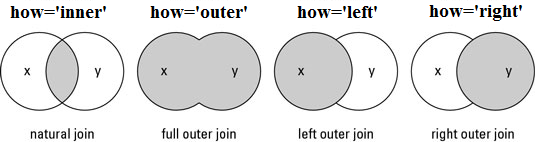

In [69]:
d = {'id': [1, 2, 10, 12], 
     'val1': ['a', 'b', 'c', 'd']}
df_1 = pd.DataFrame(d)

d = {'id': [1, 2, 9, 8],
     'val1': ['p', 'q', 'r', 's']}
df_2 = pd.DataFrame(d)

In [70]:
df_1

,id,val1
0,1,a
1,2,b
2,10,c
3,12,d


In [71]:
df_2

,id,val1
0,1,p
1,2,q
2,9,r
3,8,s


Para unir dos DataFrames de manera horizontal utilizamos el comando `pd.merge()`. Merge nos pedira que le pasemos los dataframes que queremos unir, la columna bajo la cual se hará la unión y de que manera queremos juntarlos.

In [72]:
df = pd.merge(df_1, df_2, on = 'id', how = 'inner')
df

,id,val1_x,val1_y
0,1,a,p
1,2,b,q


In [73]:
df = pd.merge(df_1, df_2, on = 'id', how = 'left')
df

,id,val1_x,val1_y
0,1,a,p
1,2,b,q
2,10,c,NaN
3,12,d,NaN


In [74]:
df = pd.merge(df_1, df_2, on = 'id', how = 'right')
df

,id,val1_x,val1_y
0,1,a,p
1,2,b,q
2,9,NaN,r
3,8,NaN,s


In [75]:
df = pd.merge(df_1, df_2, on = 'id', how = 'outer')
df

,id,val1_x,val1_y
0,1,a,p
1,2,b,q
2,10,c,NaN
3,12,d,NaN
4,9,NaN,r
5,8,NaN,s


Si las columnas bajo las cuales queremos hacer la unión de los DataFrames no tienen el mismo nombre, igualmente podemos unirlos pero debemos hacerle un pequeño cambio al comando:

In [76]:
df_1.rename(columns = {'id': 'ID'}, inplace = True)
df_1

,ID,val1
0,1,a
1,2,b
2,10,c
3,12,d


In [77]:
pd.merge(df_1, df_2, left_on = 'ID', right_on = 'id', how = 'left')

,ID,val1_x,id,val1_y
0,1,a,1.0,p
1,2,b,2.0,q
2,10,c,NaN,NaN
3,12,d,NaN,NaN


Si no es una columna lo que comparten los DataFrames sino el índicie:

In [78]:
pd.merge(df_1, df_2, left_index = True, right_index = True, how = 'left')

,ID,val1_x,id,val1_y
0,1,a,1,p
1,2,b,2,q
2,10,c,9,r
3,12,d,8,s


Si en lugar de querer juntar los DataFrames de manera horizontal, podemos hacerlo con los comandos `append()` o `concat()`

In [79]:
df_2.rename(columns = {'id': 'ID', 'var2': 'var1'}, inplace = True)

In [80]:
df_1.append(df_2).rename(columns = {'ID': 'cedula'})

,cedula,val1
0,1,a
1,2,b
2,10,c
3,12,d
0,1,p
1,2,q
2,9,r
3,8,s


In [81]:
pd.concat([df_1, df_2])

,ID,val1
0,1,a
1,2,b
2,10,c
3,12,d
0,1,p
1,2,q
2,9,r
3,8,s


Desde pandas podemos hacer gráficas muy sencillas de las columnas del DataFrame con el comando `plot()`

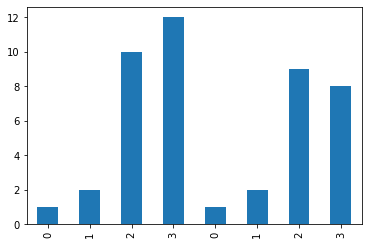

In [82]:
df = df_1.append(df_2).rename(columns = {'ID': 'cedula'})
df['cedula'].plot(kind = 'bar');

## Ejercicios <a name="ejercicios"></a>

El archivo "titatic.csv" contiene información sobre los pasajeros del Titanic. Con base en este resuelva los siguientes puntos:
1. Crear un DataFrame que contenga los datos del archivo.

In [83]:
df = pd.read_csv('titanic.csv')

2. Mostrar las dimensiones del DataFrame, el número de datos que contiene, los nombres de sus columnas y filas y los tipos de datos de las columnas.

In [84]:
df.shape # Dimensiones

(891, 12)

In [85]:
df.columns # Nombre de Columnas

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [86]:
df.index # Nombre Filas

RangeIndex(start=0, stop=891, step=1)

In [87]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

3. Calcule la media, minimo y maximo de cada una de las columnas que aplique y muestrelas como un único DataFrame.

In [88]:
df.describe().loc[['mean', 'min', 'max']]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
mean,446.0,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
min,1.0,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
max,891.0,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


4. Mostrar los datos del pasajero con identificador 148.

In [89]:
df[df['PassengerId'] == 148]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.0,2,2,W./C. 6608,34.375,NaN,S


5. Cual es el nombre y la edad del pasajero cuyo ticket es el número 111369.

In [90]:
print('Nombre:', df[df['Ticket'] == '111369']['Name'].iloc[0])
print('Edad:', df[df['Ticket'] == '111369']['Age'].iloc[0])

Nombre: Behr, Mr. Karl Howell
Edad: 26.0


6. Cree un nuevo DataFrame que contenga únicamente los pasajeron con id par.

In [91]:
df_par = df[df['PassengerId'] % 2 == 0]
df_par.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


7. Cree un nuevo DataFrame que contenga los nombres de los pasajeron de primera clase ordenados alfabeticamente de la Z a la A.

In [92]:
df[df['Pclass'] == 1].sort_values(by = 'Name', ascending = False)['Name'].to_frame()

,Name
325,"Young, Miss. Marie Grice"
555,"Wright, Mr. George"
55,"Woolner, Mr. Hugh"
351,"Williams-Lambert, Mr. Fletcher Fellows"
155,"Williams, Mr. Charles Duane"
...,...
460,"Anderson, Mr. Harry"
498,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)"
297,"Allison, Miss. Helen Loraine"
305,"Allison, Master. Hudson Trevor"


8. Que porcentaje de personas murieron y que porcentaje sobrevivieron?.

In [93]:
print('Porcentaje de Personas que Sobrevivieron: {:.2%}'.format(df['Survived'].mean()))
print('Porcentaje de Personas que Murieron: {:.2%}'.format(1 - df['Survived'].mean()))

Porcentaje de Personas que Sobrevivieron: 38.38%
Porcentaje de Personas que Murieron: 61.62%


9. Calcule el porcentaje de personas que murieron por cada clase.

In [94]:
df.groupby('Pclass', as_index = False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


10. Cree un nuevo DataFrame el cual no contenga aquellos pasajeros con edad desconocida. 

In [95]:
df.dropna(subset = ['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


11. Mostrar la edad media de las mujeres que viajaban en cada clase.

In [96]:
df_fem = df[df['Sex'] == 'female']
df_fem.groupby(['Pclass', 'Sex'], as_index = False)['Age'].mean()

,Pclass,Sex,Age
0,1,female,34.611765
1,2,female,28.722973
2,3,female,21.750000


12. Añadir una nueva columna booleana para ver si el pasajero era menor de edad o no.

In [97]:
df['Underage'] = np.where(df['Age'] < 18, True, False)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Underage
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,False


13. Mostrar el porcentaje de menores y mayores de edad que sobrevivieron en cada clase.

In [98]:
df.groupby(['Pclass', 'Underage'], as_index = False).agg({'Survived':'mean'})

,Pclass,Underage,Survived
0,1,False,0.612745
1,1,True,0.916667
2,2,False,0.409938
3,2,True,0.913043
4,3,False,0.217918
5,3,True,0.371795


14. Cree un DataFrame que contenga para cada clase: la edad promedio, la tarifa maxima y el numero de datos para hombre y para mujeres.

In [99]:
df.groupby(['Pclass', 'Sex']).agg({'Age':'mean', 'Fare': 'max','Name': 'count'})

Age      Fare  Name
Pclass Sex                              
1      female  34.611765  512.3292    94
       male    41.281386  512.3292   122
2      female  28.722973   65.0000    76
       male    30.740707   73.5000   108
3      female  21.750000   69.5500   144
       male    26.507589   69.5500   347